In [16]:
import cv2 as cv
import json
import os
import pprint as pp
from typing import List, Union

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Arrow, Rectangle, Polygon, Circle, PathPatch
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.collections import PatchCollection, PolyCollection, LineCollection
import matplotlib.colors as mcolors

import numpy as np
from numpy._typing import ArrayLike, NDArray

In [6]:
pp.PrettyPrinter(indent=4)
np.set_printoptions(suppress=True, precision=4)
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%autoreload 2
%aimport src.utils
%aimport src.disviz
%aimport src.data_worker

In [66]:
# cls_color = np.random.choice(list(mcolors.get_named_colors_mapping().keys()), (13,))
cls_colors = ['red', 'lightcoral', 'deeppink',
             'violet', 'cornflowerblue', 'cyan',
             'mediumspringgreen', 'lime', 'palegreen']
# cls_color = np.random.choice(cls_colors, (13,))

In [31]:
# pull in the paths to tested images
with open('./test.txt', 'r') as test_file:
    test_imgs = np.char.asarray(test_file.readlines())

def basename(x):
    return os.path.basename(x)
test_labels = np.vectorize(basename)((test_imgs,))[0]
test_labels = np.char.rstrip(test_labels, '.png\n')

# test_labels = basename_vec(test_imgs)
pp.pprint(test_imgs[:3])
pp.pprint(test_labels[:3])

with open('./result.json', 'r') as file:
    result = np.array(json.load(file))

chararray(['/content/screws/images/screws_006.png',
           '/content/screws/images/screws_017.png',
           '/content/screws/images/screws_022.png'], dtype='<U38')
array(['screws_006', 'screws_017', 'screws_022'], dtype='<U15')


In [33]:
test = np.loadtxt(f'./images/{test_labels[0]}.txt', delimiter=' ')



(16, 5)

In [46]:
def dis_std_annot(std_annot:ArrayLike, image_size:Union[List[int], NDArray]=[768, 576]):
    cx, cy, w, h = std_annot[..., 1:2], std_annot[..., 2:3], std_annot[..., 3:4], std_annot[..., 4:]
    x = cx - w / 2 
    y = cy - h / 2
    min_xy = np.concatenate([x, y], axis=-1) * np.full((1, 1, 2), np.array([image_size]), dtype=np.float32)
    print(min_xy.shape)
    width, height = w * image_size[0], h * image_size[1]

    return np.concatenate([min_xy, width, height], axis=-1)

In [52]:
def get_labels(file_list:NDArray):
    result = np.empty((0, 18, 5))
    for img in file_list:
        with open(f'./images/{img}.txt', 'r') as label_txt:
            labels = np.loadtxt(label_txt, delimiter=' ')
            addnum = 18 - labels.shape[0]
            labels = np.expand_dims(np.pad(labels, [(0, addnum), (0, 0)]), axis=0)
            result = np.concatenate([result, labels], axis=0)
    return result
result = get_labels(test_labels)
print(result[0, 0, 0])

7.0


In [68]:
num_classes = len(np.unique(result[0, :, 0]))
print(num_classes)

9


(60, 18, 2)


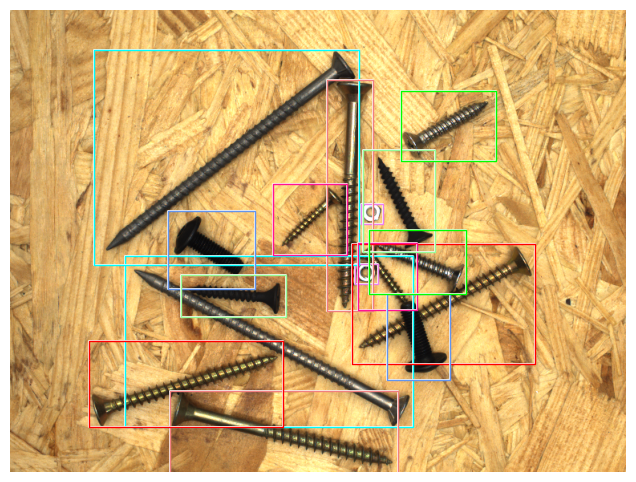

In [74]:
image = np.flip(cv.imread('./images/screws_006.png'), axis=-1)
fig, ax = plt.subplots(figsize=(8, 6))
rec_vals = dis_std_annot(result)[0]
bboxes = []
num_classes = len(np.unique(result[0, :, 0]))
cls_color = np.random.choice(cls_colors, (num_classes,), replace=False)
for idx, val in enumerate(rec_vals):
    bboxes.append(Rectangle(val[:2], val[2], val[3], color='white', lw=1.25, fill=False))
    bboxes.append(Rectangle(val[:2], val[2], val[3], color=cls_color[int(result[0, idx, 0])], lw=1, fill=False))
bbox_col = PatchCollection(bboxes, match_original=True)

ax.imshow(image)
ax.add_collection(bbox_col)
ax.axis('off')
plt.show()

